<a href="https://colab.research.google.com/github/dengelen/pubcv/blob/master/VGG01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple demo of recognizing faces using the vgg model 
First, bring some local files into the Colab space

In [0]:
from google.colab import files
uploaded = files.upload()


Saving channing_tatum.jpg to channing_tatum (1).jpg
Saving Eoghan_Quigg.jpg to Eoghan_Quigg (1).jpg
Saving sharon.jpg to sharon (1).jpg


Warnings can be given that some parts are using tensorflow 1.x and colab will move to 2.x. Has to be solved...

In [0]:
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip show keras-vggface
# This code cannot run with tensorflow_version 2.x
# %tensorflow_version 2.x

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-7or8fgyf
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-7or8fgyf
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=753979770186bec9f478da82bcb13acf8dd2c591a39b271e962c7f3e319597c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-9fepbpvu/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface
Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: six, keras, scipy, h5py, pyyaml, numpy, pillow
Required-by: 


In [0]:
# check version of keras_vggface
import keras_vggface
# print version
print(keras_vggface.__version__)

0.6


The trained model is loaded here

In [0]:
# example of creating a face embedding
from keras_vggface.vggface import VGGFace
# create a vggface2 model
model = VGGFace(model='resnet50')
# summarize input and output shape
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)

Inputs: [<tf.Tensor 'input_24:0' shape=(?, 224, 224, 3) dtype=float32>]
Outputs: [<tf.Tensor 'classifier_2/Softmax:0' shape=(?, 8631) dtype=float32>]


The original code uses following approach for detecting faces (but there are alternatives)

In [0]:
!pip install mtcnn

In [0]:
from mtcnn.mtcnn import MTCNN

This function extracts the face part from the picture

In [0]:
# Example of face detection with a vggface2 model
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
 
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array


This function predicts the name of the actor

In [0]:
def predict_face(filename):
  # load the photo and extract the face
  pixels = extract_face(filename)
  pyplot.imshow(pixels)
  # show the plot
  pyplot.show()
  # convert one face into samples
  pixels = pixels.astype('float32')
  samples = expand_dims(pixels, axis=0)
  # prepare the face for the model, e.g. center pixels
  samples = preprocess_input(samples, version=2)
  # perform prediction
  yhat = model.predict(samples)
  # convert prediction into names
  results = decode_predictions(yhat)
  # display most likely results
  for result in results[0]:
    print('%s: %.3f%%' % (result[0], result[1]*100))

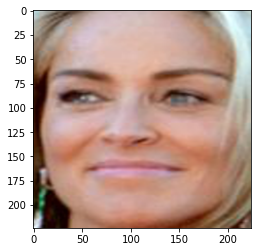

b' Sharon_Stone': 99.534%
b' Noelle_Reno': 0.085%
b' Anita_Lipnicka': 0.040%
b' Elisabeth_R\xc3\xb6hm': 0.032%
b' Emma_Atkins': 0.022%


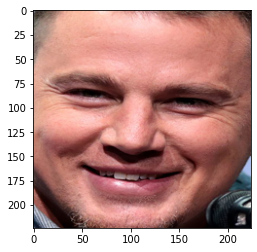

b' Channing_Tatum': 94.297%
b' Les_Miles': 0.135%
b' Eoghan_Quigg': 0.134%
b' Ibrahim_Afellay': 0.080%
b' Nico_Rosberg': 0.078%


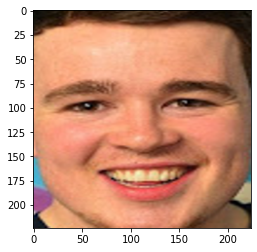

b' Eoghan_Quigg': 99.865%
b' Kim_Dotcom': 0.014%
b' James_Horwill': 0.010%
b' Jeff_Corwin': 0.007%
b' Poonam_Bajwa': 0.005%


In [0]:
predict_face('sharon.jpg')
predict_face('channing_tatum.jpg')
predict_face('Eoghan_Quigg.jpg')
